# Restaurant recommendation system

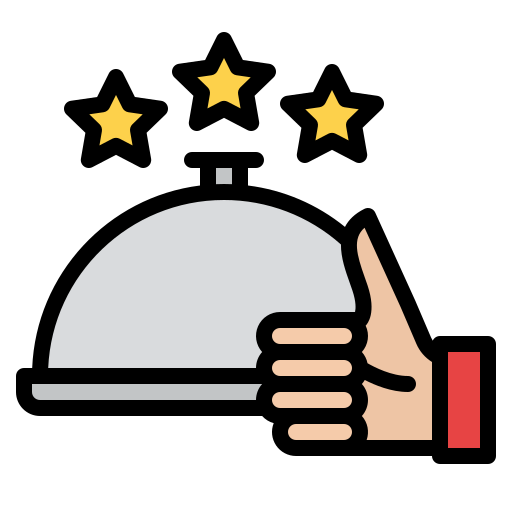

In [1]:
import os
import numpy as np
import pandas as pd
# pd.set_option('display.max_columns', 100)
# pd.set_option('display.max_rows', 10)
# pd.set_option('display.width', 1000)

In [2]:
train_df = pd.read_csv("traindata.csv")

In [3]:
test_df = pd.read_csv("testdata.csv")

In [4]:
train_df.shape

(100000, 17)

In [5]:
test_df.shape

(100000, 17)

In [6]:
train_df.duplicated().sum()

0

In [7]:
test_df.duplicated().sum()

0

In [8]:
train_df.isnull().sum()

customer_id            0
gender                 0
latitude_x             0
longitude_x            0
latitude_y             0
longitude_y            0
vendor_category_en     0
delivery_charge        0
serving_distance       0
commission             0
delivery_available     0
discount_percentage    0
language               0
rank                   0
restaurent_rating      0
restaurent_tag_name    0
restaurant_id          0
dtype: int64

In [9]:
test_df.isnull().sum()

customer_id            0
gender                 0
latitude_x             0
longitude_x            0
latitude_y             0
longitude_y            0
vendor_category_en     0
delivery_charge        0
serving_distance       0
commission             0
delivery_available     0
discount_percentage    0
language               0
rank                   0
restaurent_rating      0
restaurent_tag_name    0
restaurant_id          0
dtype: int64

In [10]:
train_df.describe()

,latitude_x,longitude_x,latitude_y,longitude_y,delivery_charge,serving_distance,commission,discount_percentage,rank,restaurent_rating,restaurant_id
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.00000,100000.000000,100000.000000,100000.000000
mean,0.914023,-31.233201,-0.265789,0.426269,0.478191,11.563380,0.0,2.63660,10.471500,4.415479,115.364460
std,19.220862,38.918890,0.650867,0.289098,0.325681,4.345371,0.0,8.32166,2.237351,0.139020,80.125992
min,-1038.000000,-132.200000,-1.008000,-0.065000,0.000000,2.000000,0.0,0.00000,1.000000,4.100000,4.000000
25%,-0.491000,-78.560000,-0.857000,0.081900,0.000000,8.000000,0.0,0.00000,11.000000,4.300000,43.000000
50%,-0.090000,-0.006000,-0.471000,0.546000,0.700000,15.000000,0.0,0.00000,11.000000,4.400000,105.000000
75%,0.201000,0.482400,0.016800,0.655900,0.700000,15.000000,0.0,0.00000,11.000000,4.500000,189.000000
max,453.800000,45.340000,1.703000,0.760000,0.700000,15.000000,0.0,35.00000,11.000000,4.700000,289.000000


In [11]:
test_df.describe()

,latitude_x,longitude_x,latitude_y,longitude_y,delivery_charge,serving_distance,commission,discount_percentage,rank,restaurent_rating,restaurant_id
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.397149,-31.595848,-0.263719,0.426314,0.479248,11.580040,0.0,2.622300,10.481700,4.415913,115.466580
std,19.891096,38.908328,0.653721,0.288989,0.325263,4.333528,0.0,8.314129,2.216848,0.138786,80.215102
min,-671.500000,-79.060000,-1.008000,-0.065000,0.000000,2.000000,0.0,0.000000,1.000000,4.100000,4.000000
25%,-0.503000,-78.560000,-0.857000,0.081900,0.000000,8.000000,0.0,0.000000,11.000000,4.300000,43.000000
50%,-0.109000,-0.007000,-0.471000,0.546000,0.700000,15.000000,0.0,0.000000,11.000000,4.400000,105.000000
75%,0.189600,0.473400,0.016800,0.655900,0.700000,15.000000,0.0,0.000000,11.000000,4.500000,189.000000
max,205.000000,44.120000,1.703000,0.760000,0.700000,15.000000,0.0,35.000000,11.000000,4.700000,289.000000


In [12]:
train_df.nunique()

customer_id            15267
gender                     2
latitude_x              6002
longitude_x             3434
latitude_y                19
longitude_y               19
vendor_category_en         2
delivery_charge            2
serving_distance           6
commission                 1
delivery_available         1
discount_percentage        3
language                   1
rank                       2
restaurent_rating          6
restaurent_tag_name       15
restaurant_id             19
dtype: int64

In [13]:
corr = train_df.corr() #correlation matrix
corr

C:\Users\Pallavi\AppData\Local\Temp\ipykernel_17796\2148147155.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = train_df.corr() #correlation matrix


,latitude_x,longitude_x,latitude_y,longitude_y,delivery_charge,serving_distance,commission,discount_percentage,rank,restaurent_rating,restaurant_id
latitude_x,1.000000,0.073231,0.003081,0.003665,0.000445,0.001333,NaN,-0.000580,-0.001409,0.002197,-0.000199
longitude_x,0.073231,1.000000,-0.002640,-0.003482,0.000053,-0.000426,NaN,0.001663,0.000704,-0.004292,0.008664
latitude_y,0.003081,-0.002640,1.000000,0.601928,0.143955,-0.059609,NaN,0.063372,0.121658,-0.031048,-0.033861
longitude_y,0.003665,-0.003482,0.601928,1.000000,0.194987,-0.602525,NaN,-0.024406,0.269860,0.443798,-0.487219
delivery_charge,0.000445,0.000053,0.143955,0.194987,1.000000,0.173600,NaN,0.215787,0.346836,-0.087526,0.026986
serving_distance,0.001333,-0.000426,-0.059609,-0.602525,0.173600,1.000000,NaN,0.250578,-0.186819,-0.420103,0.229744
commission,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
discount_percentage,-0.000580,0.001663,0.063372,-0.024406,0.215787,0.250578,NaN,1.000000,0.074843,0.073049,0.024608
rank,-0.001409,0.000704,0.121658,0.269860,0.346836,-0.186819,NaN,0.074843,1.000000,0.026301,0.074777
restaurent_rating,0.002197,-0.004292,-0.031048,0.443798,-0.087526,-0.420103,NaN,0.073049,0.026301,1.000000,-0.266914


In [14]:
train_df.head()

,customer_id,gender,latitude_x,longitude_x,latitude_y,longitude_y,vendor_category_en,delivery_charge,serving_distance,commission,delivery_available,discount_percentage,language,rank,restaurent_rating,restaurent_tag_name,restaurant_id
0,SZ5JI7X,male,-0.5050,0.0950,0.6187,0.5273,Restaurants,0.0,15.0,0.0,Yes,0.0,EN,11,4.5,"American,Burgers,Free Delivery,Hot Dogs,Pasta",106
1,WKYG878,male,0.2096,0.2810,-0.6010,0.0960,Restaurants,0.0,15.0,0.0,Yes,0.0,EN,1,4.4,"American,Burgers,Desserts,Mojitos ,Pasta",90
2,UXCWXNG,male,0.1357,-78.6000,0.6187,0.5273,Restaurants,0.0,15.0,0.0,Yes,0.0,EN,11,4.5,"American,Burgers,Free Delivery,Hot Dogs,Pasta",106
3,B9HSJBN,male,-0.8800,0.0755,-0.6010,0.0960,Restaurants,0.0,15.0,0.0,Yes,0.0,EN,1,4.4,"American,Burgers,Desserts,Mojitos ,Pasta",90
4,K3RGL6T,male,0.3879,0.5815,-0.1150,0.5460,Restaurants,0.7,15.0,0.0,Yes,0.0,EN,11,4.3,"American,Burgers,Fries,Sandwiches",43


In [15]:
test_df.head()

,customer_id,gender,latitude_x,longitude_x,latitude_y,longitude_y,vendor_category_en,delivery_charge,serving_distance,commission,delivery_available,discount_percentage,language,rank,restaurent_rating,restaurent_tag_name,restaurant_id
0,WUVD18V,male,-0.343,-78.5600,-0.1150,0.5460,Restaurants,0.7,15.0,0.0,Yes,0.0,EN,11.0,4.3,"American,Burgers,Fries,Sandwiches",43.0
1,74LFNOD,male,1.041,0.4934,0.4807,0.5527,Restaurants,0.7,15.0,0.0,Yes,0.0,EN,11.0,4.4,Burgers,28.0
2,UHSO2WH,male,2.137,0.7370,-0.4710,0.7446,Restaurants,0.7,5.0,0.0,Yes,0.0,EN,11.0,4.7,"Breakfast,Cakes,Crepes,Italian,Pasta,Pizzas,Sa...",13.0
3,NSDCBM2,male,-0.457,0.8247,-0.1150,0.5460,Restaurants,0.7,15.0,0.0,Yes,0.0,EN,11.0,4.3,"American,Burgers,Fries,Sandwiches",43.0
4,OBQQS0K,male,-1.081,0.0899,-0.5880,0.7544,Restaurants,0.0,6.0,0.0,Yes,0.0,EN,11.0,4.4,"Arabic,Breakfast,Burgers,Desserts,Free Deliver...",4.0


In [16]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   customer_id          100000 non-null  object 
 1   gender               100000 non-null  object 
 2   latitude_x           100000 non-null  float64
 3   longitude_x          100000 non-null  float64
 4   latitude_y           100000 non-null  float64
 5   longitude_y          100000 non-null  float64
 6   vendor_category_en   100000 non-null  object 
 7   delivery_charge      100000 non-null  float64
 8   serving_distance     100000 non-null  float64
 9   commission           100000 non-null  float64
 10  delivery_available   100000 non-null  object 
 11  discount_percentage  100000 non-null  float64
 12  language             100000 non-null  object 
 13  rank                 100000 non-null  int64  
 14  restaurent_rating    100000 non-null  float64
 15  restaurent_tag_nam

In [17]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   customer_id          100000 non-null  object 
 1   gender               100000 non-null  object 
 2   latitude_x           100000 non-null  float64
 3   longitude_x          100000 non-null  float64
 4   latitude_y           100000 non-null  float64
 5   longitude_y          100000 non-null  float64
 6   vendor_category_en   100000 non-null  object 
 7   delivery_charge      100000 non-null  float64
 8   serving_distance     100000 non-null  float64
 9   commission           100000 non-null  float64
 10  delivery_available   100000 non-null  object 
 11  discount_percentage  100000 non-null  float64
 12  language             100000 non-null  object 
 13  rank                 100000 non-null  float64
 14  restaurent_rating    100000 non-null  float64
 15  restaurent_tag_nam

In [18]:
train_df = train_df[['customer_id','restaurant_id','restaurent_rating']]

In [19]:
test_df = test_df[['customer_id','restaurant_id','restaurent_rating']]

In [20]:
train_df.head()

,customer_id,restaurant_id,restaurent_rating
0,SZ5JI7X,106,4.5
1,WKYG878,90,4.4
2,UXCWXNG,106,4.5
3,B9HSJBN,90,4.4
4,K3RGL6T,43,4.3


In [21]:
test_df.head()

,customer_id,restaurant_id,restaurent_rating
0,WUVD18V,43.0,4.3
1,74LFNOD,28.0,4.4
2,UHSO2WH,13.0,4.7
3,NSDCBM2,43.0,4.3
4,OBQQS0K,4.0,4.4


In [22]:
train_df.restaurant_id.value_counts().sort_values(ascending=True)[:10]

28     5141
191    5149
105    5198
44     5222
192    5225
110    5236
157    5244
106    5255
33     5259
289    5265
Name: restaurant_id, dtype: int64

In [23]:
train_df.customer_id.value_counts().sort_values(ascending=False)[:10]

X58BXH0    66
O86521G    56
YYKZN0F    52
9VJZUWB    48
YQC2R6H    47
PVEP9F4    40
6YGBG1F    39
ICN6274    38
ZGFSYCZ    38
DBL0X78    38
Name: customer_id, dtype: int64

In [24]:
train_df.restaurent_rating.value_counts()

4.3    31557
4.5    26247
4.4    21048
4.6    10495
4.1     5360
4.7     5293
Name: restaurent_rating, dtype: int64

In [25]:
test_df.restaurant_id.value_counts()

105.0    5310
44.0     5302
13.0     5294
33.0     5289
289.0    5283
192.0    5282
157.0    5282
106.0    5282
104.0    5270
265.0    5269
43.0     5268
28.0     5265
191.0    5260
148.0    5260
189.0    5245
110.0    5238
4.0      5222
82.0     5196
90.0     5183
Name: restaurant_id, dtype: int64

In [26]:
test_df.customer_id.value_counts()[:10]

240EZSU    140
PEHRJ52    122
MKAEKR4    114
FE4K5BT    110
1ILTBK0    107
U9P9W4A    101
UAEFMK3    100
LFY4ZMA     99
BKLWPZ8     99
Q3IH11V     96
Name: customer_id, dtype: int64

In [27]:
test_df.restaurent_rating.value_counts()

4.3    31648
4.5    26405
4.4    20866
4.6    10527
4.7     5294
4.1     5260
Name: restaurent_rating, dtype: int64

In [28]:
rating_average = train_df.groupby('restaurant_id')['restaurent_rating'].mean()
rating_count = train_df.groupby('restaurant_id')['restaurent_rating'].count()

In [29]:
rating_average = rating_average.to_frame()
rating_average.rename(columns={'restaurent_rating':'rating_average'}, inplace= True)
rating_average

,rating_average
restaurant_id,
4,4.4
13,4.7
28,4.4
33,4.6
43,4.3
44,4.3
82,4.4
90,4.4
104,4.5


In [35]:
rating_count = rating_count.to_frame()
rating_count.rename(columns={'restaurent_rating':'rating_count'}, inplace= True)

In [36]:
df = rating_average.merge(rating_count,on='restaurant_id')

In [37]:
df

,rating_average,rating_count
restaurant_id,,
4,4.4,5302
13,4.7,5293
28,4.4,5141
33,4.6,5259
43,4.3,5307
44,4.3,5222
82,4.4,5320
90,4.4,5285
104,4.5,5380


In [38]:
C = df['rating_average'].mean()
C

4.415789473684211

In [39]:
m = df['rating_count'].quantile(0.3)
m

5239.2

In [40]:
restaurants = df.copy().loc[df['rating_count'] >= m]
restaurants.shape

(13, 2)

In [41]:
def weighted_rating(x, m=m, C=C):
    v = x['rating_count']
    R = x['rating_average']
    return (v/(v+m) * R) + (m/(m+v) * C)

In [42]:
restaurants['score'] = restaurants.apply(weighted_rating, axis=1)

In [43]:
restaurants = restaurants.sort_values('score', ascending=False)
restaurants.index.to_list()[:5]

[13, 33, 104, 289, 106]

In [46]:
import pandas as pd
# !pip install surprise
from surprise import Reader, Dataset, SVD
from surprise.accuracy import rmse, mae
from surprise.model_selection import cross_validate

In [47]:
train_df.isna().sum()

customer_id          0
restaurant_id        0
restaurent_rating    0
dtype: int64

In [51]:
n_restaurants = train_df['restaurant_id'].nunique()
n_customers = train_df['customer_id'].nunique()
print(f'Number of unique restaurants: {n_restaurants}')
print(f'Number of unique n_customers: {n_customers}')

Number of unique restaurants: 19
Number of unique n_customers: 15267



Sparsity of our data

Sparsity (%) = (No of missing values/ (Total Values))X100


In [52]:
available_ratings = train_df['restaurent_rating'].count()
total_ratings = n_restaurants*n_customers
missing_ratings = total_ratings - available_ratings
sparsity = (missing_ratings/total_ratings) * 100
print(f'Sparsity: {sparsity}')

Sparsity: 65.52591933754607


<Axes: >

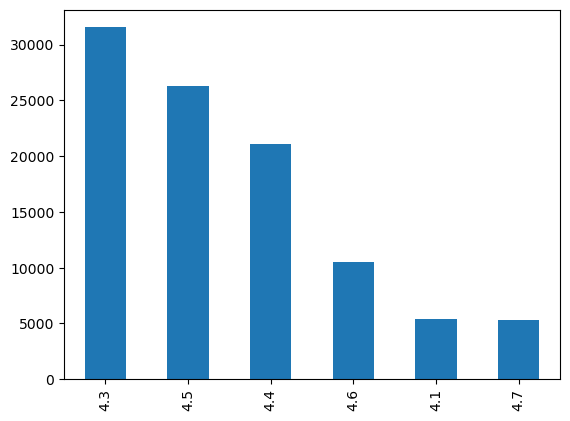

In [54]:
train_df['restaurent_rating'].value_counts().plot(kind='bar')


Dimensionality Reduction

In [56]:
filter_restaurants = train_df['restaurant_id'].value_counts() > 5
filter_restaurants = filter_restaurants[filter_restaurants].index.tolist()

In [57]:
filter_customers = train_df['customer_id'].value_counts() > 5
filter_customers = filter_customers[filter_customers].index.tolist()

In [59]:
print(f'Original shape: {train_df.shape}')
df = train_df[(train_df['restaurant_id'].isin(filter_restaurants)) & (train_df['customer_id'].isin(filter_customers))]
print(f'New shape: {df.shape}')

Original shape: (100000, 3)
New shape: (71578, 3)


In [61]:
df.head()

,customer_id,restaurant_id,restaurent_rating
1,WKYG878,90,4.4
2,UXCWXNG,106,4.5
3,B9HSJBN,90,4.4
4,K3RGL6T,43,4.3
5,RLI3ZCV,82,4.4


In [62]:
cols = ['customer_id','restaurant_id','restaurent_rating']

In [65]:
reader = Reader(rating_scale = (0.5, 5))
data = Dataset.load_from_df(df[cols], reader)

In [66]:
trainset = data.build_full_trainset()
antiset = trainset.build_anti_testset()

In [68]:
algo = SVD(n_epochs =25, verbose = True)

In [70]:
cross_validate(algo, data, measures = ['RMSE', 'MAE'], cv=5, verbose= True)
print('>> Training Done')

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Processing epoch 20
Processing epoch 21
Processing epoch 22
Processing epoch 23
Processing epoch 24
Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Processing epoch 20
Processing epoch 21
Processing epoch 22
Processing epoch 23
Processing epoch 24
Processing epoch 0
P

In [72]:
predictions = algo.test(antiset)

In [73]:
predictions[0]

Prediction(uid='WKYG878', iid=106, r_ui=4.415612338986839, est=4.501414370840907, details={'was_impossible': False})

In [74]:
from collections import defaultdict


def get_top_n(predictions, n=5):
    top_n = defaultdict(list)
    for uid, iid, _, est, _ in predictions:
        top_n[uid].append((iid, est))
        
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key = lambda x: x[1], reverse = True)
        top_n[uid] = user_ratings[:n]
        
    return top_n

top_n = get_top_n(predictions, n=5)

for uid, user_ratings in top_n.items():
    print(uid, [iid for (iid, rating) in user_ratings])

WKYG878 [33, 105, 289, 106, 104]
UXCWXNG [13, 33, 104, 105, 289]
B9HSJBN [110, 289, 104, 191, 4]
K3RGL6T [13, 33, 289, 90, 265]
RLI3ZCV [13, 289, 106, 104, 44]
TVPZBS6 [33, 104, 82, 192, 265]
E7WCVKD [13, 33, 289, 106, 90]
LVO55D6 [13, 33, 110, 104, 105]
91P269G [13, 33, 106, 104, 28]
2NS8HDP [105, 28, 265, 43, 148]
MKVVKWL [104, 82, 4, 28, 90]
VGAIVWE [33, 110, 105, 106, 104]
JXV287F [13, 110, 33, 289, 4]
0ECDDSB [104, 82, 192, 157, 43]
AG5ZJPK [13, 104, 191, 90, 4]
M2PLKLD [33, 110, 289, 106, 104]
3D3NI9G [13, 110, 105, 106, 4]
5R9VZ83 [13, 110, 289, 104, 106]
XW37IN9 [13, 106, 105, 104, 28]
QMJLT1X [13, 110, 33, 104, 105]
9M3M21S [33, 110, 104, 191, 82]
SHWYMDW [13, 106, 104, 105, 82]
E21KCFI [13, 33, 110, 191, 104]
PVEP9F4 [104]
I1GSL6D [13, 110, 33, 191, 289]
WPNO7FC [104, 191, 4, 90, 43]
VGLNVU3 [104, 90, 189, 44]
08F2YRP [90, 28, 44]
HL5I5TL [13, 33, 110, 104, 105]
0WC5I47 [13, 110, 191, 104, 105]
C3MNZ53 [13, 110, 106, 105, 191]
OCUN0RY [110, 104, 191, 105, 90]
H1NJCO1 [13, 110